In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Load dataset
df = pd.read_csv("boston_house_prices_1000.csv")

X = df.drop(columns=["PRICE"]).values
y = df["PRICE"].values.reshape(-1, 1)

In [6]:
# Normalize features
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

In [7]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# convert to pytorch tensors 
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [9]:
# Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

In [10]:
# Nearual Network Model
class NeuralNetworkModel(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetworkModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )
    
    def forward(self, x):
        return self.net(x)

In [13]:
# Training loop
def train_model(model, X_train, y_train, epochs=200, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        model.train()
        output = model(X_train)
        loss = criterion(output, y_train)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    
    return losses

Epoch 20/200, Loss: 1.4506
Epoch 40/200, Loss: 1.1818
Epoch 60/200, Loss: 0.9813
Epoch 80/200, Loss: 0.8373
Epoch 100/200, Loss: 0.7359
Epoch 120/200, Loss: 0.6645
Epoch 140/200, Loss: 0.6130
Epoch 160/200, Loss: 0.5741
Epoch 180/200, Loss: 0.5432
Epoch 200/200, Loss: 0.5174


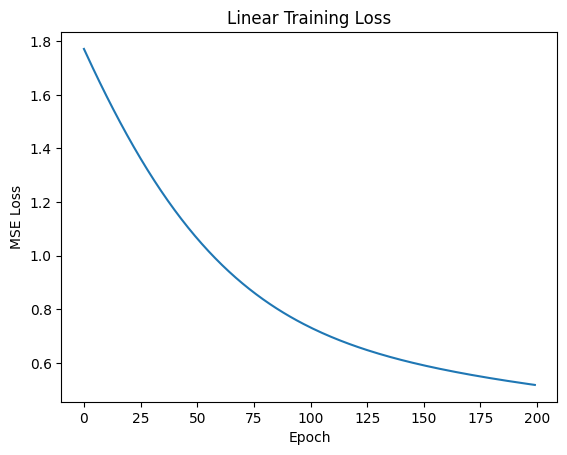

Predicted: 15.48, Actual: 9.70
Predicted: 33.85, Actual: 31.00
Predicted: 7.76, Actual: 13.50
Predicted: 7.62, Actual: 11.80
Predicted: 29.86, Actual: 31.10


In [14]:
# Linear model
input_dim = X_train.shape[1]

model = LinearRegressionModel(input_dim)

losses = train_model(model, X_train_tensor, y_train_tensor)

# Plot loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Linear Training Loss")
plt.show()

# Evaluate
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions_rescaled = scaler_y.inverse_transform(predictions.numpy())
    y_test_rescaled = scaler_y.inverse_transform(y_test_tensor.numpy())

# Print a few predictions
for pred, actual in zip(predictions_rescaled[:5], y_test_rescaled[:5]):
    print(f"Predicted: {pred[0]:.2f}, Actual: {actual[0]:.2f}")

Epoch 20/200, Loss: 0.5953
Epoch 40/200, Loss: 0.3605
Epoch 60/200, Loss: 0.2367
Epoch 80/200, Loss: 0.1761
Epoch 100/200, Loss: 0.1357
Epoch 120/200, Loss: 0.1101
Epoch 140/200, Loss: 0.0927
Epoch 160/200, Loss: 0.0803
Epoch 180/200, Loss: 0.0704
Epoch 200/200, Loss: 0.0621


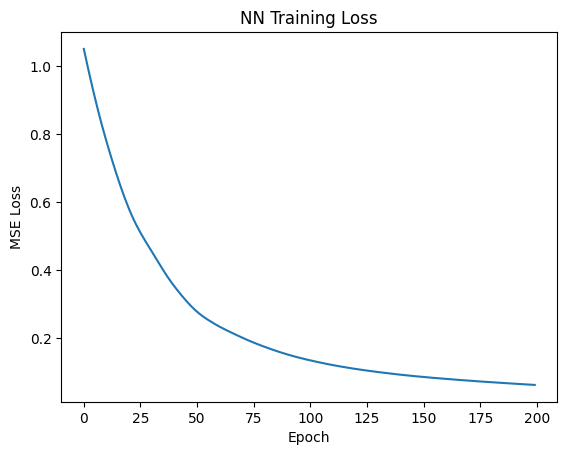

Predicted: 11.20, Actual: 9.70
Predicted: 34.22, Actual: 31.00
Predicted: 13.28, Actual: 13.50
Predicted: 9.43, Actual: 11.80
Predicted: 30.00, Actual: 31.10


In [15]:
# Linear model
input_dim = X_train.shape[1]

model = NeuralNetworkModel(input_dim)

losses = train_model(model, X_train_tensor, y_train_tensor)

# Plot loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("NN Training Loss")
plt.show()

# Evaluate
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions_rescaled = scaler_y.inverse_transform(predictions.numpy())
    y_test_rescaled = scaler_y.inverse_transform(y_test_tensor.numpy())

# Print a few predictions
for pred, actual in zip(predictions_rescaled[:5], y_test_rescaled[:5]):
    print(f"Predicted: {pred[0]:.2f}, Actual: {actual[0]:.2f}")